In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
%matplotlib inline


# Считываем данные
df = pd.read_csv('/content/drive/MyDrive/Pythonfiles - MFTI/HW2 -   heart.csv').drop_duplicates()

df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()
print(df.shape[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 45.4 KB
302


In [ ]:
df.count()

age         302
sex         302
cp          302
trtbps      302
chol        302
fbs         302
restecg     302
thalachh    302
exng        302
oldpeak     302
slp         302
caa         302
thall       302
output      302
dtype: int64

In [ ]:
#"дырок" в данных нет
#есть один дубликат, который удалять не стал из-за минимального влияния на итоговое решение

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb210b1a290>,
      dtype=object)

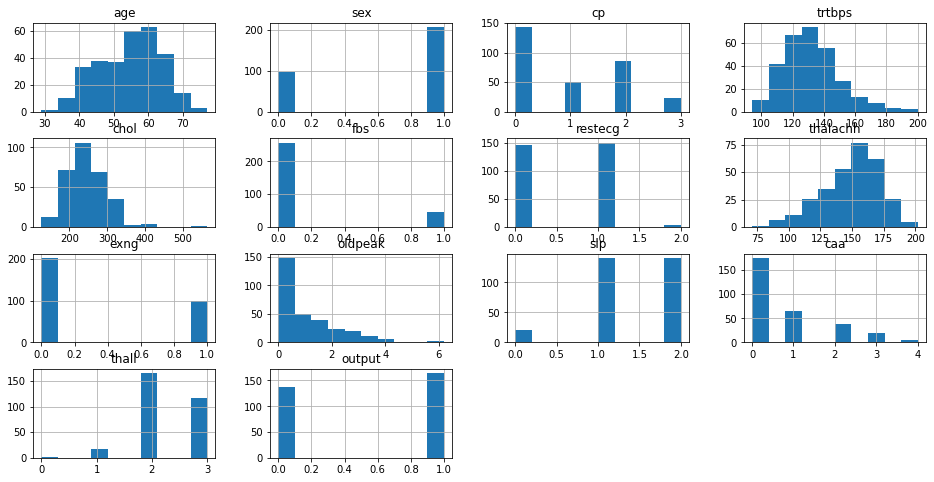

In [ ]:
df.hist(figsize=(16,8))

In [ ]:
# каких-то заметных на глаз аномалий не вижу

age        -0.221476
sex        -0.283609
cp          0.432080
trtbps     -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalachh    0.419955
exng       -0.435601
oldpeak    -0.429146
slp         0.343940
caa        -0.408992
thall      -0.343101
Name: output, dtype: float64


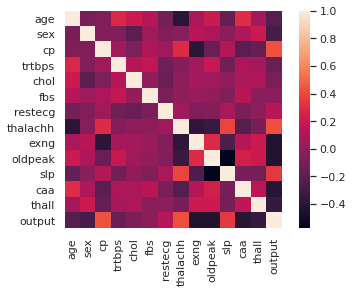

In [ ]:
# определяем "в лоб" и на графику корелляцию различных признаков с итоговым значением (output)
import seaborn as sns
corrnew = df[df.columns[0:14]].corr()['output'][:-1]
print(corrnew)
sns.heatmap(df.corr(), square=True, fmt='.2f')



In [ ]:
#мы имеем высокую корелляцию сердечного приступа (output) с:
#cp - Chest Pain type chest pain type
#thalachh - maximum heart rate achieved
#slp - Slope (крутизна пульса)
#restecg - Resting electrocardiographic results (р-ты ЭКГ)

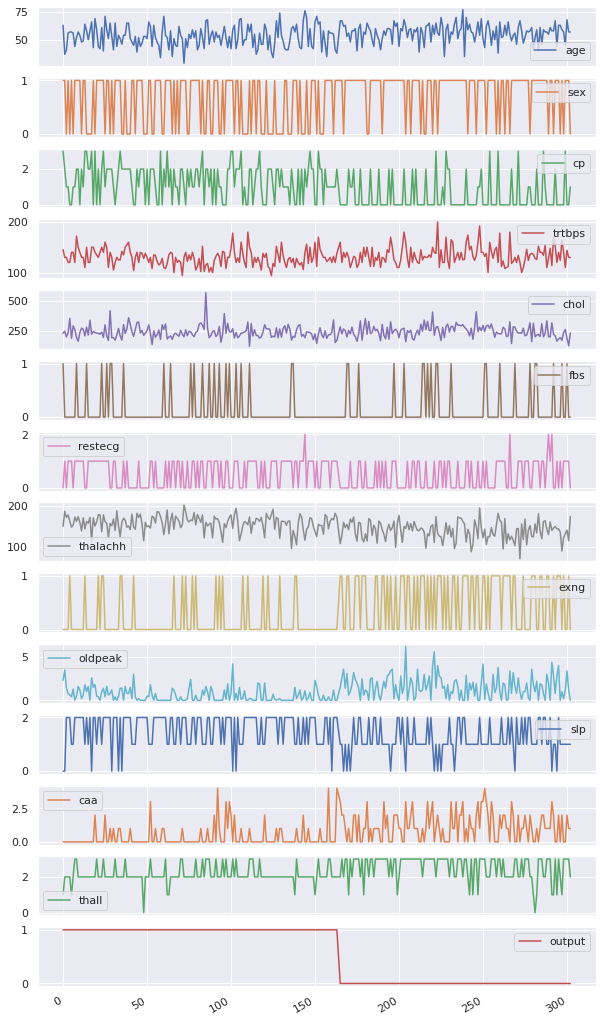

In [ ]:
df.plot(subplots=True, figsize = (10, 20))
plt.show()

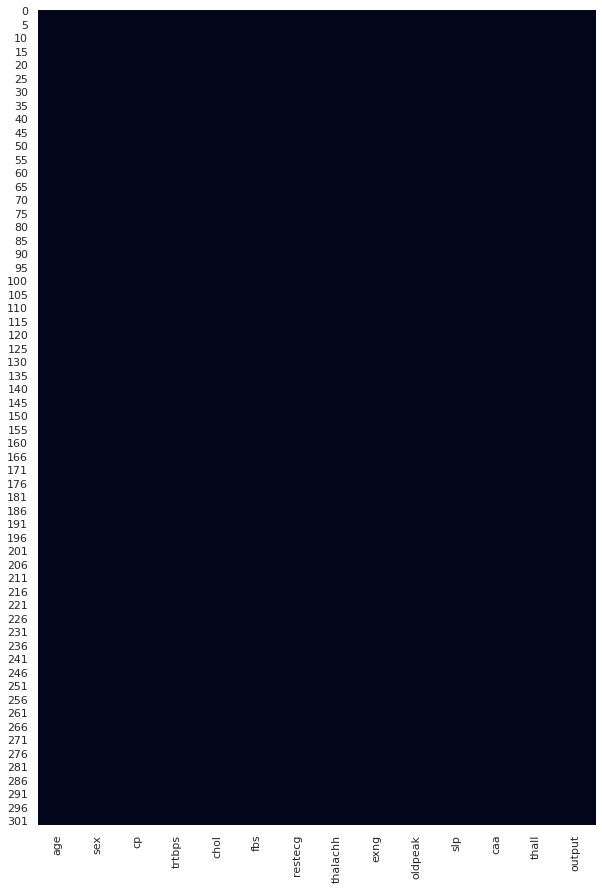

In [ ]:
#еще раз наглядная проверка DF на пустые значения
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize = (10, 15))
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
#смотрим сбалансированность разбивки output
#критичной несбалансированности (а-ля 1 к 10) не вижу
df.groupby('output').count()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,138,138,138,138,138,138,138,138,138,138,138,138,138
1,164,164,164,164,164,164,164,164,164,164,164,164,164


In [ ]:
# Проверяем, что все признаки числовые
# Да, с датасетом повезло, он полностью числовой и никаких признаков не надо оцифровывать
Categorical_cols = list(set(df.columns) - set(df._get_numeric_data().columns))
Categorical_cols


[]

In [ ]:
#get dummies не используем, т.к. признаки изначально числовые
#df = load_data() # reset dataframe
#df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [5]:
#Конвертируем dataframe в np.array, к-й требует на вход sklearn
#X - выборка без ответа, y - массив с ответами
X=np.array(df[df.columns[0:13]])
y=np.array(df['output'])

In [3]:
#Подключаем sklearn и модули кросс-валидации

# Подключаем модель k ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# Модуль для работы с кросс-валидацией
from sklearn.model_selection import GridSearchCV

# Функция отрисовки графиков
def grid_plot(x, y, x_label, title, y_label='cross_val'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

{'n_neighbors': 27} 0.6557923497267759


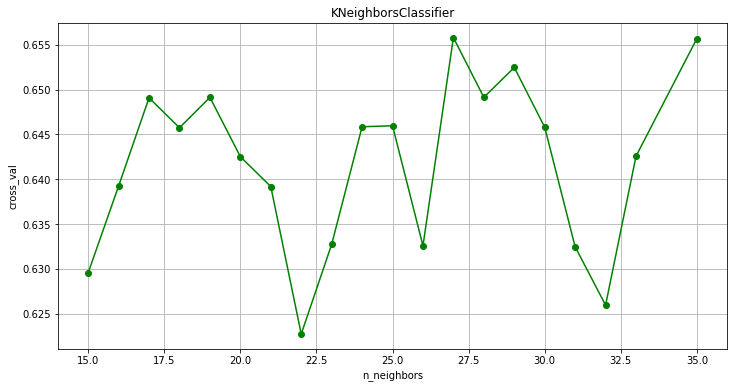

In [6]:
# Параметры кросс-валидации
# Результат 0.65
cv_settings=np.array(np.linspace(15, 35, 20), dtype='int')

# Пропишем сетку для  алгоритма n_neighbors из параметра выше
knn_grid = {'n_neighbors': cv_settings} 

# Создаем объект кросс-валидации
#cv - кол-во проходов, knn_grid - сетка, n_jobs - настройка параллелей
gs = GridSearchCV(knn, knn_grid, cv=5, n_jobs = -1)

# Обучаем его
gs.fit(X, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
print(gs.best_params_, gs.best_score_)

# Строим график зависимости качества от числа соседей
# замечание: результаты обучения хранятся в атрибуте cv_results_ объекта gs
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [ ]:
gs.cv_results_

{'n_neighbors': 27} 0.6853763440860215


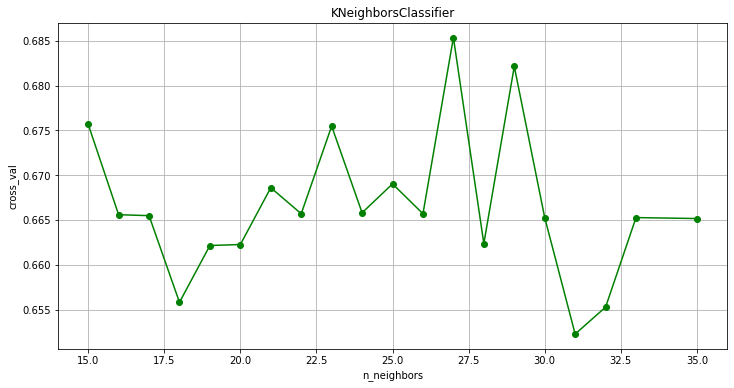

In [7]:
#Первый пример из обучающего занятия
#Результат 0.68

# Настройка кросс-валидации
cv_settings=np.array(np.linspace(15, 35, 20), dtype='int')

# по аналогии поменяем количество точек для проверки разных значений параметра k - 11 точек в диапазоне от 15 до 35 (равные промежутки, int)
knn_grid = {'n_neighbors': cv_settings}
gs = GridSearchCV(knn, knn_grid, cv=10)
gs.fit(X, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
print(gs.best_params_, gs.best_score_)

# график
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

{'n_neighbors': 28} 0.8409289617486339


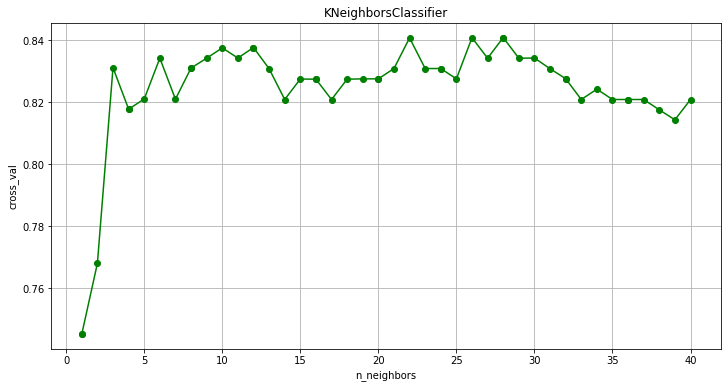

In [ ]:
#Добавил масштабирование признаков X_scaled
#Получил 0.84. Гораздо лучше!

#Настройка кросс-валидации
cv_settings=np.array(np.linspace(1, 40), dtype='int')

#scale
from sklearn.preprocessing import scale
X_scaled = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

# по аналогии поменяем количество точек для проверки разных значений параметра k - 11 точек в диапазоне от 15 до 35 (равные промежутки, int)
knn_grid = {'n_neighbors': cv_settings}
gs = GridSearchCV(knn, knn_grid, cv=5)
gs.fit(X_scaled, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
print (gs.best_params_, gs.best_score_)

# отобразим результат по аналогии
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

{'n_neighbors': 11} 0.8509513742071881


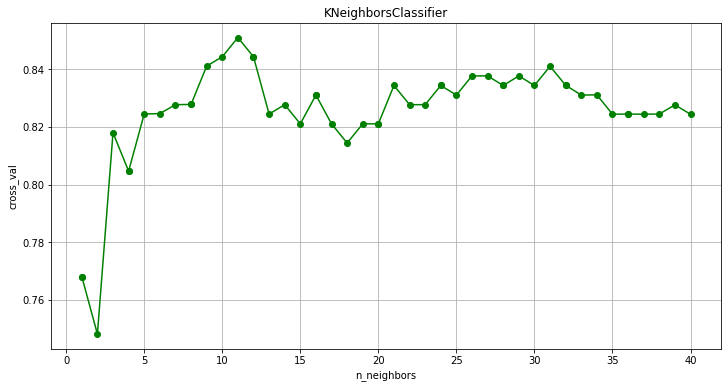

In [ ]:
#Максимальный результат на основе кода, взятого из наших занятий: 0.85
#Перебор параметров: кросс-валидация дает оптимильные результаты на отрезке 1-40, по 7 сплитов

# Настройка кросс-валидации
cv_settings=np.array(np.linspace(1, 40), dtype='int')

#scale
from sklearn.preprocessing import scale
X_scaled = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

# по аналогии поменяем количество точек для проверки разных значений параметра k - 11 точек в диапазоне от 15 до 35 (равные промежутки, int)
knn_grid = {'n_neighbors': cv_settings}
gs = GridSearchCV(knn, knn_grid, cv=7) 
gs.fit(X_scaled, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
print (gs.best_params_, gs.best_score_)

# отобразим результат по аналогии
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [ ]:
#Попробовал алгоритм Random Forest
#Несмотря на то, что он победил в одном из лучших решений в Kaggle на тестах: 
#https://www.kaggle.com/sercanyesiloz/heart-attack-eda-prediction/notebook
#Я получил всего 0.84, хотя на результатах Kaggle декларировалось >0.9 
#Параметры (param_grid) копировал 1 в 1
#Предполагаю, что разница в результирующих метриках

# Настройка кросс-валидации
cv_settings=np.array(np.linspace(1, 40), dtype='int')

#scale
from sklearn.preprocessing import scale
X_scaled = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

#import либ для RFC
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True, ) 

param_grid = { 
    "max_features": [1,3,10],
    "min_samples_split":[2,3,10],
    "min_samples_leaf":[1,3,10],
    "bootstrap":[True],
    "n_estimators":[100,300],
    "criterion":["gini"]
}

gs = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
gs.fit(X_scaled, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
print (gs.best_params_, gs.best_score_)

# отобразим результат по аналогии
#grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

{'bootstrap': True, 'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100} 0.8474863387978143


{'min_samples_split': 35} 0.8651766925204425


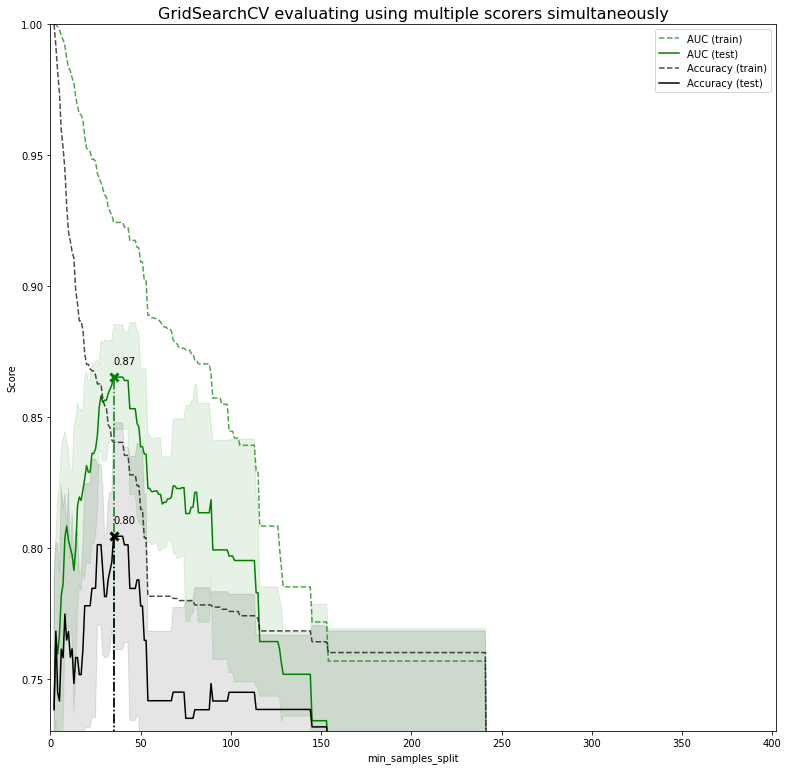

In [ ]:
#Максимальный итоговый результат из моей подборки - 0.86
#Данный пример взят с документашки по sklearn
#Результат разбегается с вышеуказанным примером с Kaggle и неожиданно показывает 
#максимальный р-т из всех испробованных мной подходов

# Настройка кросс-валидации
cv_settings=np.array(np.linspace(1, 40), dtype='int')

#scale
from sklearn.preprocessing import scale
X_scaled = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={'min_samples_split': range(2, 403, 1)},
                  scoring=scoring, refit='AUC', return_train_score=True)
gs.fit(X_scaled, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
print (gs.best_params_, gs.best_score_)

#get results
results = gs.cv_results_

# отобразим результат по аналогии
#grid_plot(knn_grid['min_samples_split'], gs.cv_results_['accuracy_score'], 'n_neighbors', 'KNeighborsClassifier')
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Отрисовку взял также с примеров
# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()